# Import Modules and Read Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

# For Hopkins Statistics
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

# Feature Scaling
from sklearn.preprocessing import StandardScaler

# For K Means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# For Hierarchical Clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

plt.style.use("ggplot")

In [2]:
country_df = pd.read_csv("Country-data.csv")
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
#'exports', 'health', 'imports' are given in percentage of gdpp. This features would be converted to their actual values.
country_df[['exports','health','imports']] = country_df[['exports','health','imports']].apply(lambda x : x*country_df["gdpp"]/100)
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [5]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Insights:-
    It is observed that all the columns are filled and few of the variables are showing presence of outliers.

# Data Visualization

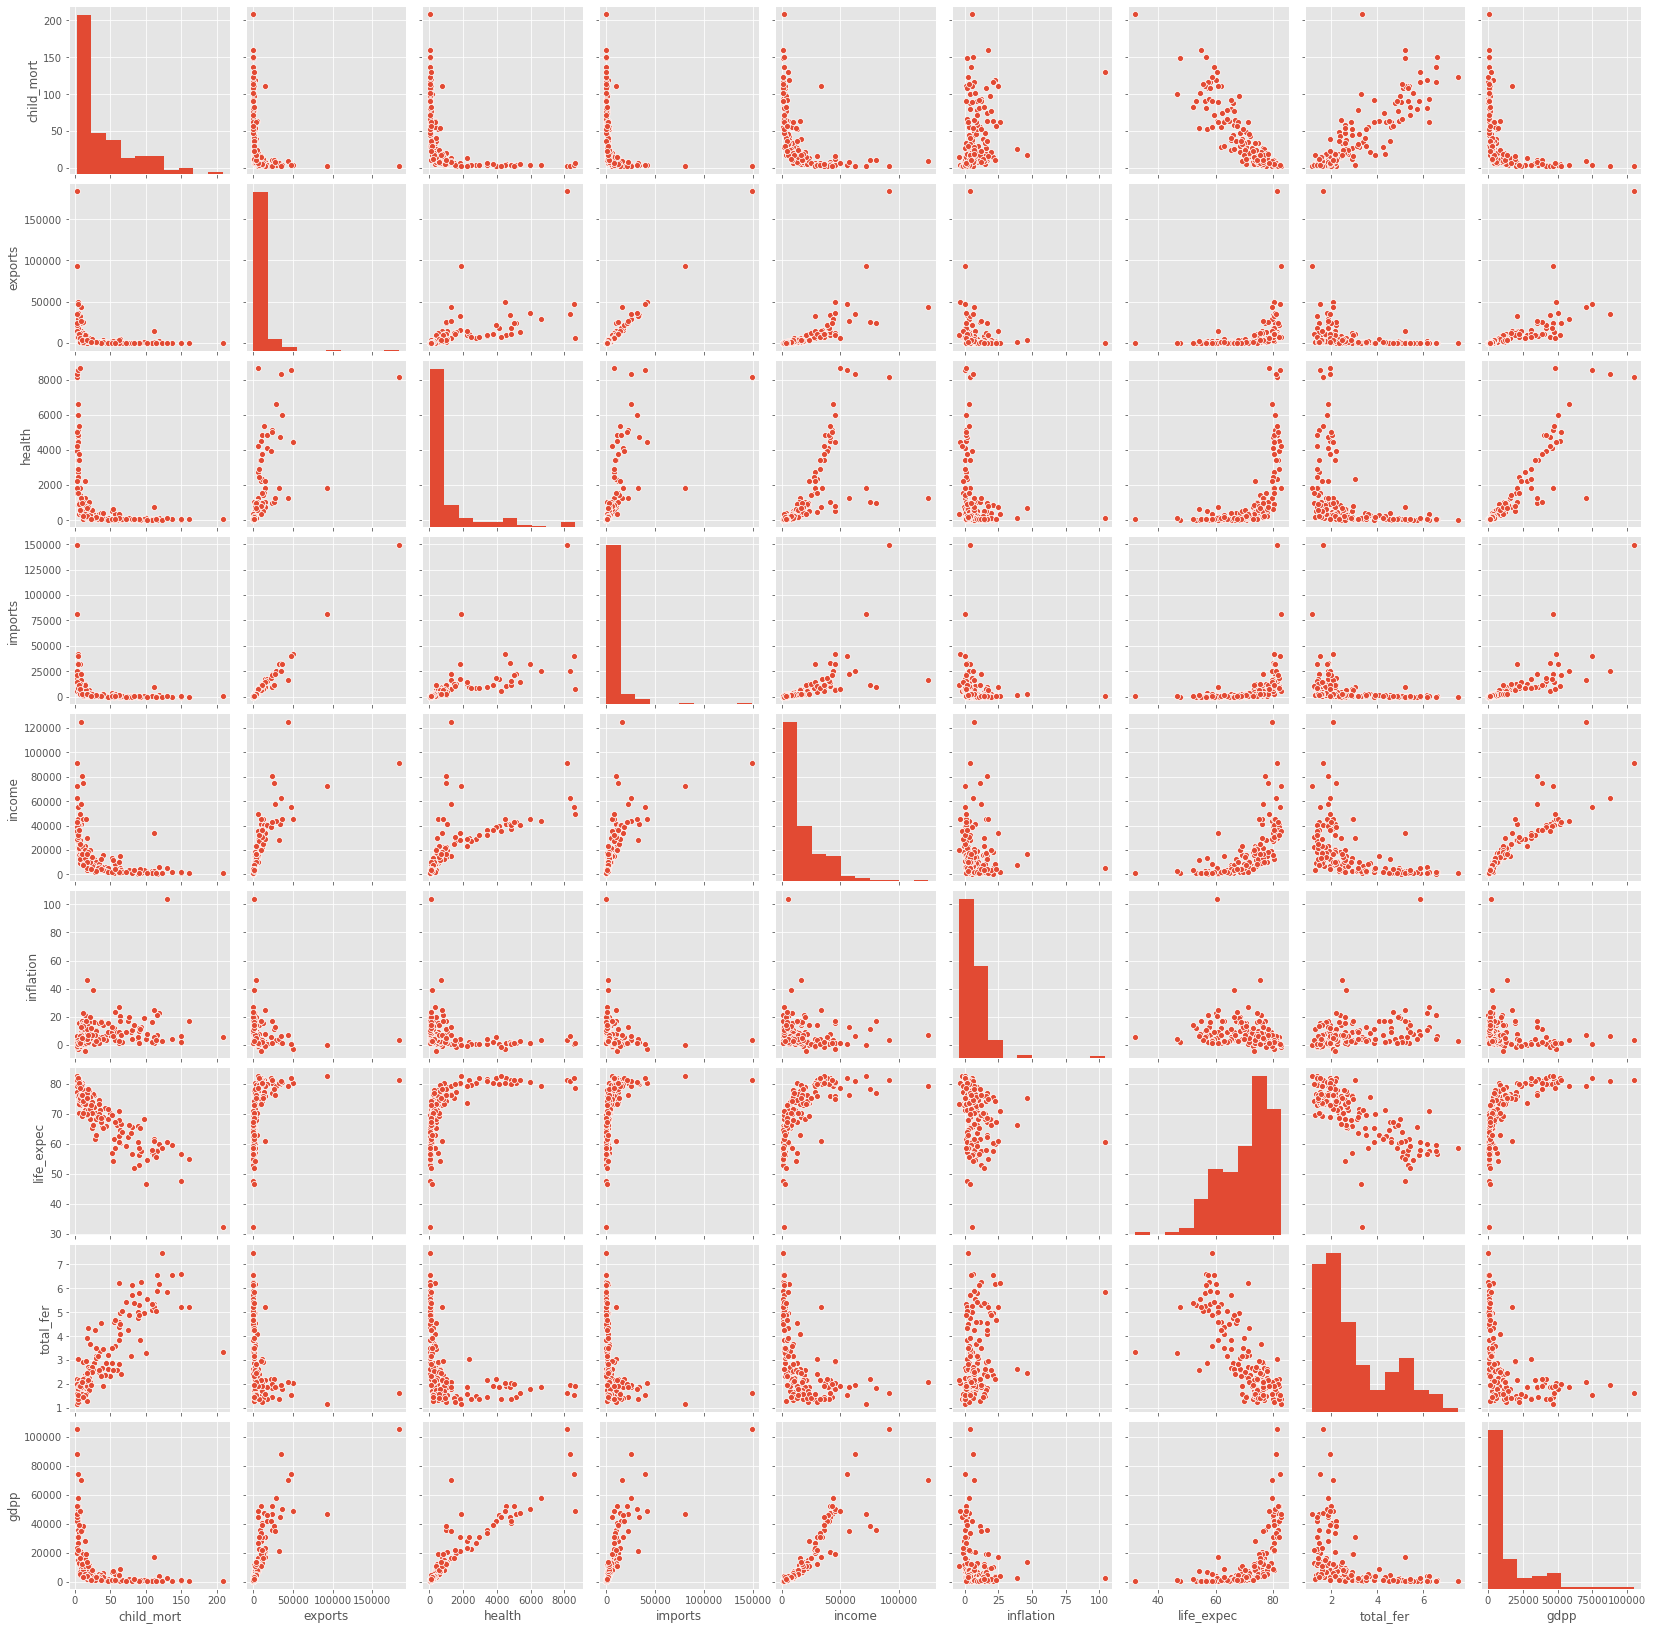

In [6]:
# Bivariate Analysis

sns.pairplot(country_df)
plt.show()

Insights:-

1.gdpp is linearly related with exports, health, imports, income. (positively correlated).

2.child_mort is negatively correlated with life_expec (greater the child mortality, lesser the life expectancy) and positive

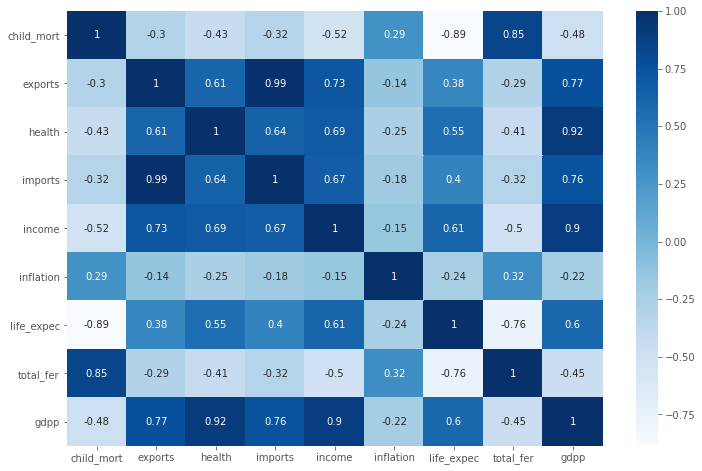

In [7]:
plt.figure(figsize = (12,8))  
sns.heatmap(country_df.corr(),annot = True, cmap='Blues')
plt.show()


###### Insights:

-imports and exports (correlation factor = 0.99) Positively and highly correlated

-health and gdpp (correlation factor = 0.92)Positively and highly correlated


-income and gdpp (correlation factor = 0.9)Positively and highly correlated


-life_expce and child_mort (correlation factor = -0.89)Negatively and highly correlated


-total_fer and child_mort (correlation factor = 0.85)Positively and highly correlated


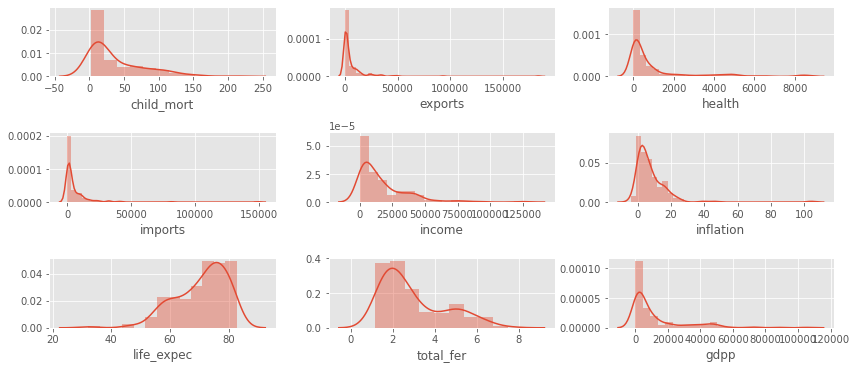

In [8]:
# univariate analysis

fig=plt.subplots(figsize=(12, 10))

for i, feature in enumerate(country_df.drop('country', axis=1).columns):
    plt.subplot(6, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.distplot(country_df[feature])
    plt.tight_layout()

###### Insights:

-Except Life expectancy (life_expec) all other features are right-skewed.

## Handling Outliers

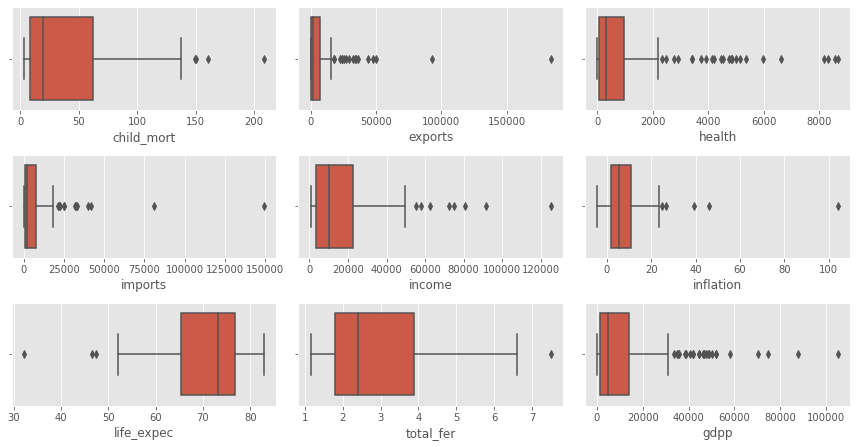

In [9]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(country_df.drop('country', axis=1).columns):
    plt.subplot(6, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(country_df[feature])
    plt.tight_layout()

###### Insights:-

.Outliers for features like 'child_mort', 'inflation', 'life_expec', 'total_fer' signifies critical socio-economic and health conditions (i.e under-developed countries)

.Outliers for exports, imports, health, income, gdpp features are mostly contributed by developed countries with better socio-economic and health conditions than rest. (i.e. developed countries)

.As observed earlier there are too many outliers, removing the outliers would mean insufficient data for analysis. Hence, flooring is performed for values lower than (Q1 - 1.5 IQR) and capping is peformed for values higher than (Q3 + 1.5 IQR)where, Q1 = 25th percentile, Q3 = 75th percentile and IQR = (Q3 - Q1)

.The new dataframe after outlier treatment will be 'country_df_updated'

.For child_mort, outliers are in higher values, not capping this feature as this feature would be to used to rank the countries according their need of financial aid.

.gdpp and income do not have outliers in lower range- they only have outliers in the higher range, hence outlier treatmeant would not affect the final ranking of the countries.

.Rest other features will be capped and floored as the outliers represent the developed countries that do not need financial aid.

In [10]:
country_df_updated = country_df.iloc[:,:]

def outliers_for_features(country_df, col):    
    Q1 = country_df.loc[:,col].quantile(0.25)
    Q3 = country_df.loc[:,col].quantile(0.75)
    
    upper_limit = Q3 + 1.5*(Q3-Q1)
    lower_limit = Q1 - 1.5*(Q3-Q1)
    
    return country_df_updated[col].apply(lambda x : upper_limit if x > upper_limit else lower_limit if x < lower_limit else x)
    
for col in ['life_expec','inflation', 'total_fer', 'exports', 'imports', 'health', 'income', 'gdpp']:
    country_df_updated[col] = outliers_for_features(country_df, col)

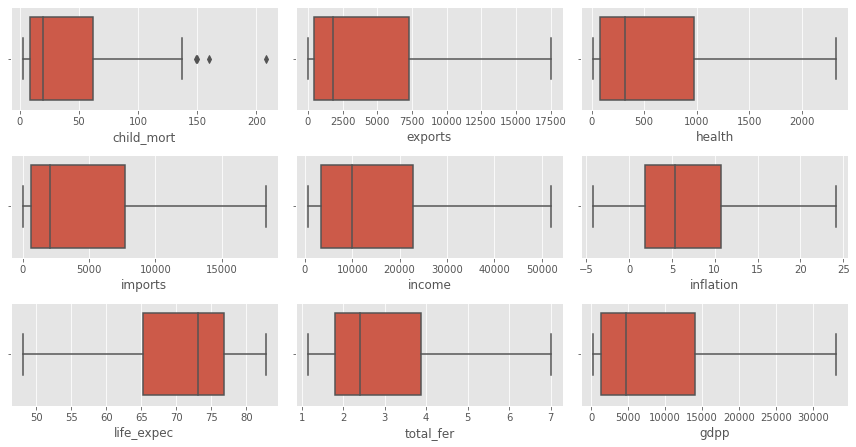

In [11]:
# Checking the distribution after flooring and capping

fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(country_df_updated.drop('country', axis=1).columns):
    plt.subplot(6, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(country_df_updated[feature])
    plt.tight_layout()

In [12]:
country_df_updated

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950.0,2.62,63.0,3.50,2970.0
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500.0,24.16,75.4,2.47,13500.0
164,Vietnam,23.3,943.20,89.6040,1050.620,4490.0,12.10,73.1,1.95,1310.0
165,Yemen,56.3,393.00,67.8580,450.640,4480.0,23.60,67.5,4.67,1310.0


# Checking Suitability of dataset for clustering, Hopkins test

In [13]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [14]:
hopkins(country_df.drop('country', axis = 1))

0.8429444207379068

In [15]:
hopkins(country_df_updated.drop('country', axis = 1))

0.9304637892327324

###### Insights:

High value of Hopkins Statistics implements that dataset has high tendency to cluster

# Scaling the data

In [16]:
standard_scaler = StandardScaler()
country_df_scaled = standard_scaler.fit_transform(country_df_updated.iloc[:, 1:])

# Clustering

#### K means:-

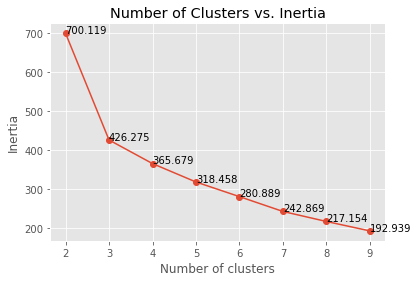

In [17]:
#Choosing k-value for K means algorithm
ssd = []
num_of_clusters = list(range(2,10))

for n in num_of_clusters:
    km = KMeans(n_clusters = n, max_iter = 50, random_state=101).fit(country_df_scaled)
    ssd.append(km.inertia_)
    
plt.plot(num_of_clusters, ssd, marker='o')

for xy in zip(num_of_clusters, ssd):    
    plt.annotate(s = round(xy[1],3), xy = xy,  textcoords='data')

plt.xlabel("Number of clusters")
plt.ylabel("Inertia") # Inertia is within cluster sum of squares
plt.title("Number of Clusters vs. Inertia")
plt.show()

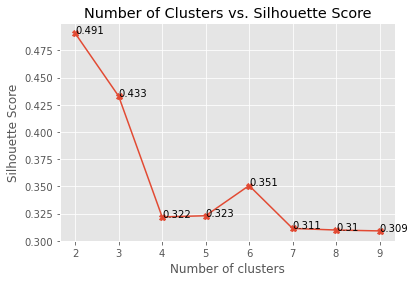

In [18]:
silhouette_value = []
for n in range(2,10):
    km = KMeans(n_clusters = n, random_state=101).fit(country_df_scaled)
    silhouette_value.append(silhouette_score(country_df_scaled, km.labels_))
    
plt.plot(num_of_clusters, silhouette_value, marker='X', label=silhouette_value)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Number of Clusters vs. Silhouette Score")

for xy in zip(num_of_clusters, silhouette_value):    
    plt.annotate(s = round(xy[1],3), xy = xy,  textcoords='data')
    
plt.show()

###### Insights:
K=2 has highest Silhouette score but it will make more sense to take more than 2 clusters for under-developed, developing and developed countries.

Hence k=3 is closen.

In [19]:
# Building K Means model with 3 clusters
km = KMeans(n_clusters=3, max_iter=100 , random_state = 101)
km.fit(country_df_scaled)

KMeans(max_iter=100, n_clusters=3, random_state=101)

In [20]:
print(km.labels_)
print(km.labels_.shape)

[2 1 1 2 1 1 1 0 0 1 0 0 1 1 1 0 1 2 1 1 1 1 1 0 1 2 2 1 2 0 1 2 2 1 1 1 2
 2 2 1 2 1 0 0 0 1 1 1 1 2 2 0 1 0 0 2 2 1 0 2 0 1 1 2 2 1 2 0 0 1 1 1 2 0
 0 0 1 0 1 1 2 2 0 1 2 1 1 2 2 1 1 0 1 2 2 1 1 2 0 2 1 1 1 1 1 1 2 1 2 1 0
 0 2 2 0 0 2 1 1 1 1 1 0 0 1 1 2 1 0 2 1 1 2 0 0 0 2 1 0 0 1 1 2 1 0 0 1 2
 1 2 2 1 1 1 1 2 1 0 0 0 1 1 1 1 1 2 2]
(167,)


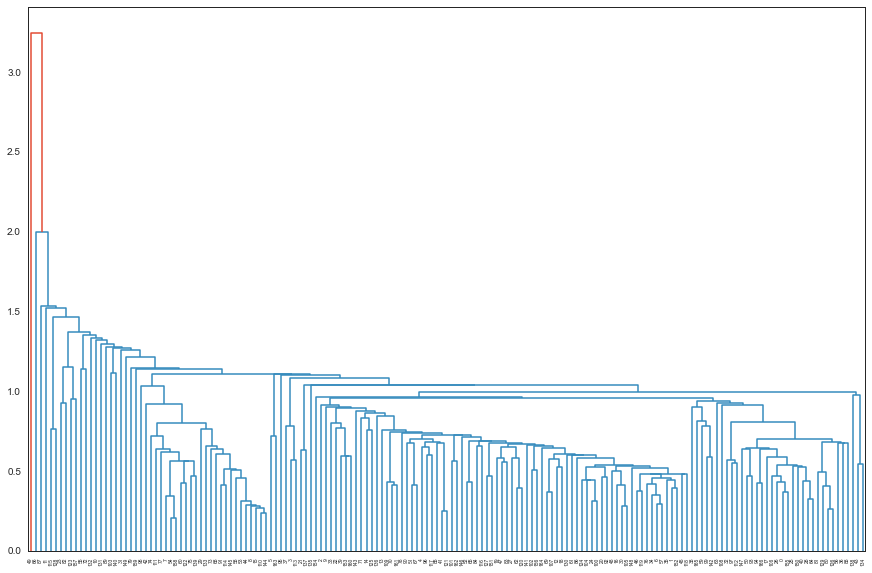

In [21]:
### Hierarchical Clustering
plt.figure(figsize=(15,10))             # Setting the size of the figure
sns.set_style('white')                  # Setting style
mergings_single = linkage(country_df_scaled, method="single", metric='euclidean')
dendrogram(mergings_single)
plt.show()

Insights:

With single linkage clusters are not interpretable.
Using complete linkage.

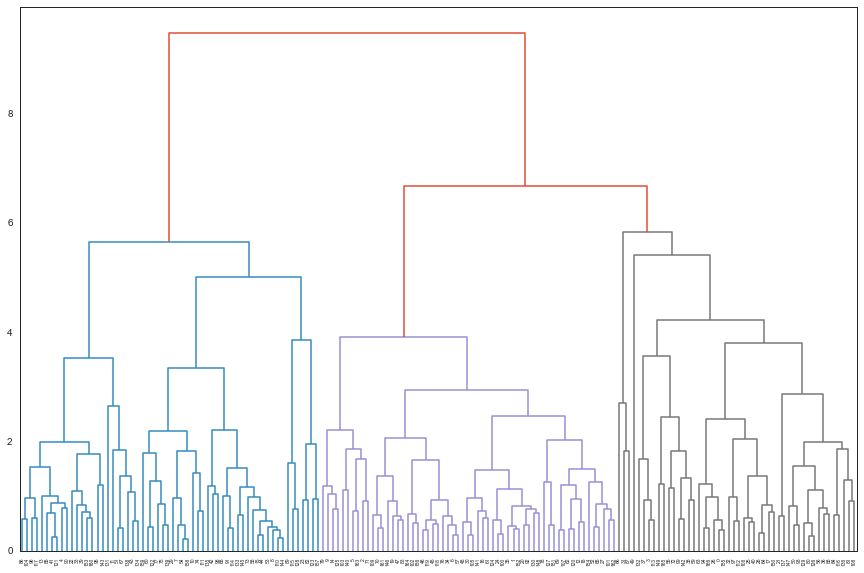

In [22]:
plt.figure(figsize=(15,10))             # Setting the size of the figure
sns.set_style('white')                  # Setting style
mergings_complete = linkage(country_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings_complete)
plt.show()

Insights: The dendogram generate from Hierarchical Clustering with complete linkage shows 3 clusters distinctly. Hence 3 clusters are chosen.

In [23]:
# Taking 3 clusters for hierarchical clustering
cluster_labels = cut_tree(mergings_complete, n_clusters=3).reshape(-1, )
print(cluster_labels)
print(cluster_labels.shape)

[0 1 1 0 2 1 1 2 2 1 2 2 1 2 1 2 1 0 1 1 1 0 2 2 1 0 0 1 0 2 1 0 0 2 1 1 0
 0 0 2 0 2 2 2 2 1 1 1 1 0 0 2 1 2 2 0 0 1 2 0 2 1 1 0 0 1 0 2 2 1 1 1 0 2
 2 2 1 2 1 1 0 0 2 1 0 2 2 0 0 2 2 2 1 0 0 2 2 0 2 0 1 1 1 1 2 1 0 1 0 1 2
 2 0 0 2 2 0 2 1 1 1 2 2 2 1 1 0 1 2 0 1 2 0 2 2 2 0 0 2 2 1 1 0 2 2 2 1 0
 1 0 0 1 1 2 1 0 1 2 2 2 2 1 1 1 1 0 0]
(167,)


In [24]:
country_df_clustered = country_df_updated.iloc[:,:]
country_df_clustered = pd.concat([country_df_clustered, pd.DataFrame(km.labels_, columns=['cluster_id_km'])], axis = 1)
country_df_clustered = pd.concat([country_df_clustered, pd.DataFrame(cluster_labels, columns=['cluster_id_hc'])], axis = 1)
country_df_clustered.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_km,cluster_id_hc
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1,2


Insights:

The new dataframe country_df_clustered has original data along with cluster labels given by both K Means and Hierarchical clustering model

In [25]:
#Counts of country falling into 0,1,2 categories
print(country_df_clustered['cluster_id_km'].value_counts())
print(country_df_clustered['cluster_id_hc'].value_counts())

1    80
2    46
0    41
Name: cluster_id_km, dtype: int64
2    60
1    59
0    48
Name: cluster_id_hc, dtype: int64


In [26]:
#Hierarchical Clustering model
print("Cluster 0 of Hierarchical Clustering model")
print(country_df_clustered[country_df_clustered['cluster_id_hc'] == 0].country.unique())

print("Cluster 1 of Hierarchical Clustering model")
print(country_df_clustered[country_df_clustered['cluster_id_hc'] == 1].country.unique())

print("Cluster 2 of Hierarchical Clustering model")
print(country_df_clustered[country_df_clustered['cluster_id_hc'] == 2].country.unique())

Cluster 0 of Hierarchical Clustering model
['Afghanistan' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi'
 'Cameroon' 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon'
 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Iraq' 'Kenya'
 'Kiribati' 'Lao' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Mozambique' 'Namibia' 'Niger' 'Nigeria' 'Pakistan' 'Rwanda'
 'Senegal' 'Sierra Leone' 'Solomon Islands' 'South Africa' 'Sudan'
 'Tanzania' 'Timor-Leste' 'Togo' 'Uganda' 'Yemen' 'Zambia']
Cluster 1 of Hierarchical Clustering model
['Albania' 'Algeria' 'Argentina' 'Armenia' 'Azerbaijan' 'Bangladesh'
 'Belarus' 'Belize' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Bulgaria'
 'Cambodia' 'Cape Verde' 'China' 'Colombia' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Fiji' 'Georgia' 'Grenada' 'Guatemala' 'Guyana'
 'India' 'Indonesia' 'Iran' 'Jamaica' 'Jordan' 'Kazakhstan'
 'Kyrgyz Republic

In [27]:
#KMeans model
print("Cluster 0 of KMeans model")
print(country_df_clustered[country_df_clustered['cluster_id_km'] == 0].country.unique())

print("Cluster 1 of KMeans model")
print(country_df_clustered[country_df_clustered['cluster_id_km'] == 1].country.unique())

print("Cluster 2 of KMeans model")
print(country_df_clustered[country_df_clustered['cluster_id_km'] == 2].country.unique())

Cluster 0 of KMeans model
['Australia' 'Austria' 'Bahamas' 'Bahrain' 'Belgium' 'Brunei' 'Canada'
 'Cyprus' 'Czech Republic' 'Denmark' 'Estonia' 'Finland' 'France'
 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy' 'Japan'
 'Kuwait' 'Luxembourg' 'Malta' 'Netherlands' 'New Zealand' 'Norway' 'Oman'
 'Portugal' 'Qatar' 'Saudi Arabia' 'Singapore' 'Slovak Republic'
 'Slovenia' 'South Korea' 'Spain' 'Sweden' 'Switzerland'
 'United Arab Emirates' 'United Kingdom' 'United States']
Cluster 1 of KMeans model
['Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Azerbaijan' 'Bangladesh' 'Barbados' 'Belarus' 'Belize' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Bulgaria'
 'Cambodia' 'Cape Verde' 'Chile' 'China' 'Colombia' 'Costa Rica' 'Croatia'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Fiji' 'Georgia'
 'Grenada' 'Guatemala' 'Guyana' 'India' 'Indonesia' 'Iran' 'Jamaica'
 'Jordan' 'Kazakhstan' 'Kyrgyz Republic' 'Latvia' 'Lebanon' 'Libya'


## Cluster Profiling

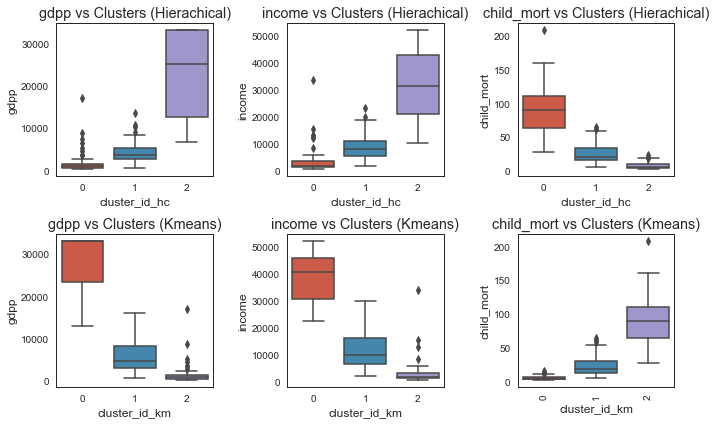

In [28]:
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(2, 3, 1, title="gdpp vs Clusters (Hierachical)")
ax4 = fig.add_subplot(2, 3, 4, title="gdpp vs Clusters (Kmeans)")

ax2 = fig.add_subplot(2, 3, 2, title="income vs Clusters (Hierachical)")
ax5 = fig.add_subplot(2, 3, 5, title="income vs Clusters (Kmeans)")

ax3 = fig.add_subplot(2, 3, 3, title="child_mort vs Clusters (Hierachical)")
ax6 = fig.add_subplot(2, 3, 6, title="child_mort vs Clusters (Kmeans)")

sns.boxplot(country_df_clustered['cluster_id_hc'],country_df_clustered['gdpp'],ax=ax1)
sns.boxplot(country_df_clustered['cluster_id_km'],country_df_clustered['gdpp'],ax=ax4)

sns.boxplot(country_df_clustered['cluster_id_hc'],country_df_clustered['income'],ax=ax2)
sns.boxplot(country_df_clustered['cluster_id_km'],country_df_clustered['income'],ax=ax5)

sns.boxplot(country_df_clustered['cluster_id_hc'],country_df_clustered['child_mort'],ax=ax3)
sns.boxplot(country_df_clustered['cluster_id_km'],country_df_clustered['child_mort'],ax=ax6)


plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

###### Insights:

Cluster 0 of Hierarchical model is similar with cluster 2 of Kmeans model (socio-economically backward countries/under developed countries)
Cluster 1 of Hierarchical model is similar with cluster 1 of Kmeans model
Cluster 2 of Hierarchical model is similar with cluster 0 of Kmeans model (socio-economically forward countries)

We can analyse the clusters by comparing how these three variables relate - [gdpp, child_mort and income] to each cluster of countries to select and differentiate the clusters of developed countries from the clusters of under-developed countries.

Also, we need to perform visualisations on the clusters that have been formed. we can do this by choosing any two of the three variables mentioned above on the X-Y axes and plotting a scatter plot of all the countries and differentiating the clusters. Creating visualisations for all the three pairs.

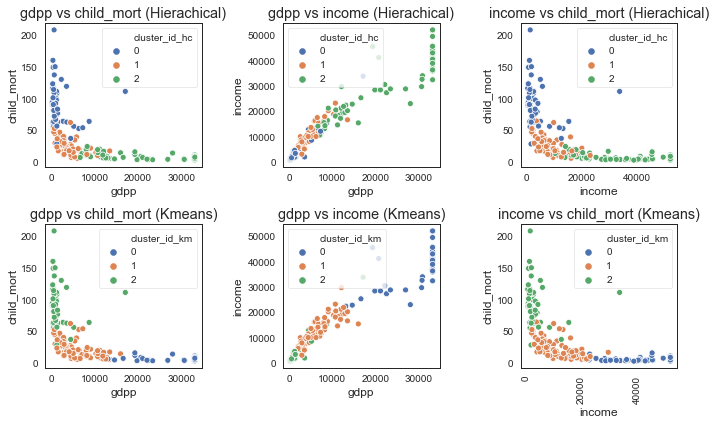

In [29]:
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(2, 3, 1, title="gdpp vs child_mort (Hierachical)")
ax4 = fig.add_subplot(2, 3, 4, title="gdpp vs child_mort (Kmeans)")

ax2 = fig.add_subplot(2, 3, 2, title="gdpp vs income (Hierachical)")
ax5 = fig.add_subplot(2, 3, 5, title="gdpp vs income (Kmeans)")

ax3 = fig.add_subplot(2, 3, 3, title="income vs child_mort (Hierachical)")
ax6 = fig.add_subplot(2, 3, 6, title="income vs child_mort (Kmeans)")

sns.scatterplot(country_df_clustered['gdpp'],country_df_clustered['child_mort'],hue=country_df_clustered['cluster_id_hc'], palette="deep",ax=ax1)
sns.scatterplot(country_df_clustered['gdpp'],country_df_clustered['child_mort'],hue=country_df_clustered['cluster_id_km'],ax=ax4, palette="deep")

sns.scatterplot(country_df_clustered['gdpp'],country_df_clustered['income'],hue=country_df_clustered['cluster_id_hc'],ax=ax2, palette="deep")
sns.scatterplot(country_df_clustered['gdpp'],country_df_clustered['income'],hue=country_df_clustered['cluster_id_km'],ax=ax5, palette="deep")

sns.scatterplot(country_df_clustered['income'],country_df_clustered['child_mort'],hue=country_df_clustered['cluster_id_hc'],ax=ax3, palette="deep")
sns.scatterplot(country_df_clustered['income'],country_df_clustered['child_mort'],hue=country_df_clustered['cluster_id_km'],ax=ax6, palette="deep")

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

###### Insights:

Top row represents results of Hierarchical Clustering and bottom row represents KMeans Clustering.
Each column represents same pair of features.

1.Countries with low gdpp (GDP per capita) have high child mortality rate.

2.Countries with low income (Net income per person) have high child mortality.

3.gdpp and income have strong linear relationship.

From the 3 features (gdpp, income and child_mort), the countries that need the financial aid at most belong to cluster 0 of hierarchical model and cluster 2 of K means model.

In [30]:
country_df_clustered.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_km,cluster_id_hc
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1,2


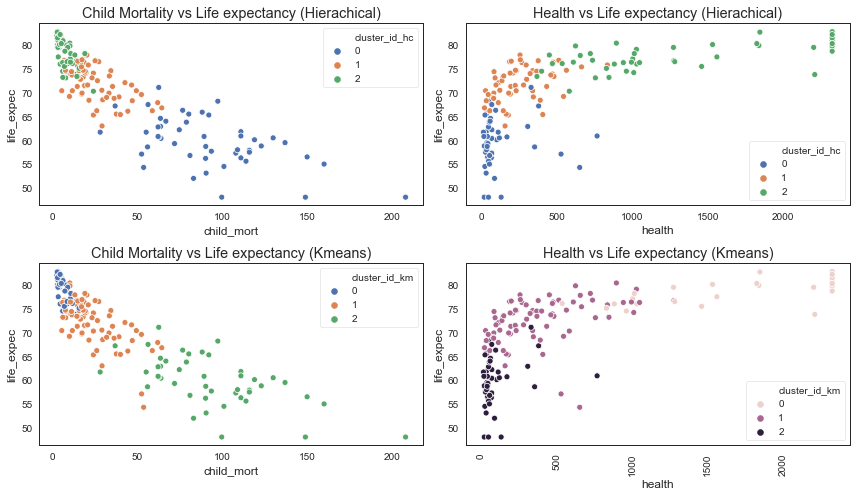

In [31]:
fig = plt.figure(figsize=(12,7))

ax1 = fig.add_subplot(2, 2, 1, title="Child Mortality vs Life expectancy (Hierachical)")
ax3 = fig.add_subplot(2, 2, 3, title="Child Mortality vs Life expectancy (Kmeans)")
ax2 = fig.add_subplot(2, 2, 2, title="Health vs Life expectancy (Hierachical)")
ax4 = fig.add_subplot(2, 2, 4, title="Health vs Life expectancy (Kmeans)")

sns.scatterplot(country_df_clustered['child_mort'],country_df_clustered['life_expec'],hue=country_df_clustered['cluster_id_hc'],ax=ax1, palette="deep")
sns.scatterplot(country_df_clustered['child_mort'],country_df_clustered['life_expec'],hue=country_df_clustered['cluster_id_km'],ax=ax3, palette="deep")
sns.scatterplot(country_df_clustered['health'],country_df_clustered['life_expec'],hue=country_df_clustered['cluster_id_hc'],ax=ax2, palette="deep")
sns.scatterplot(country_df_clustered['health'],country_df_clustered['life_expec'],hue=country_df_clustered['cluster_id_km'],ax=ax4, palette="deep")

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [32]:
# Under-developed countries obtained from both the model

country_df_clustered[(country_df_clustered['cluster_id_hc']==0) | (country_df_clustered['cluster_id_km']==1)].sort_values(by=['gdpp', 'income', 'child_mort'], ascending=['True', 'True', 'False'])[['country','cluster_id_hc','cluster_id_km']]

,country,cluster_id_hc,cluster_id_km
26,Burundi,0,2
88,Liberia,0,2
37,"Congo, Dem. Rep.",0,2
112,Niger,0,2
132,Sierra Leone,0,2
...,...,...,...
33,Chile,2,1
163,Venezuela,1,1
41,Croatia,2,1
13,Barbados,2,1


## Conclusion:
K-Means vs Hierarchical Clustering:-

gdpp, income and child_mort are 3 main driving factors for clustering.
Low gdpp and income imply high rate of child mortality.
Life expectancy in the under-developed countries is low because of high child mortality rate.
 Although both the models are providing almost same insights but we preferred Hierarchial clustering over K-means clustering.

Hierarchical Clustering model is chosen as final model as Kmeans can produce different results depending on the initial positions of the centroids of the cluster.

Also KMeans needs prespecified number of clusters.

In Hierarchical model, the dendogram has better interpretability than KMeans and also does not need the number of clusters to be specified before.

Hence, Hierarchical Clustering model is chosen for the final list of countries.

In [33]:
# Final list of under-developed countries, in order of socio-economic condition from worst to better -
# Countries on which we require to focus more are

country_df_clustered[(country_df_clustered['cluster_id_hc']==0)].sort_values(by=['gdpp', 'income', 'child_mort'], ascending=['True', 'True', 'False'])[['country']].head(15)

,country
26,Burundi
88,Liberia
37,"Congo, Dem. Rep."
112,Niger
132,Sierra Leone
93,Madagascar
106,Mozambique
31,Central African Republic
94,Malawi
50,Eritrea
